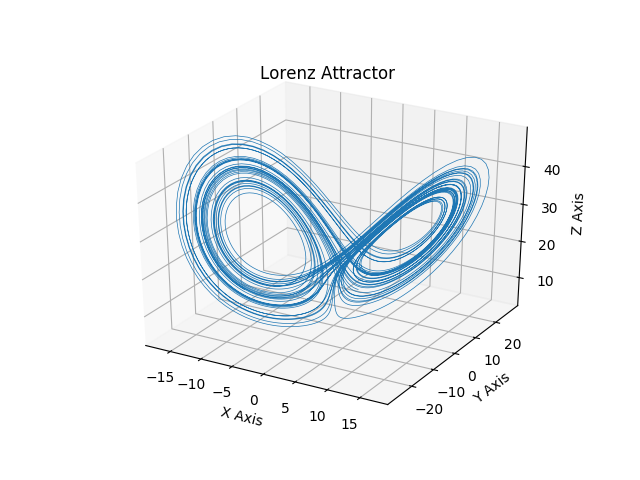

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def lorenz(xyz, *, s=5, r=28, b=2.667):
    _, x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([1, x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 30000

xyzs = np.empty((num_steps + 1, 4))  # Need one more for the initial values
xyzs[0] = (0, 0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

xyz_coords = np.empty((num_steps+1, 3))
for i in range(num_steps+1):
    xyz_coords[i] = xyzs[i][1:]

#print(xyz_coords)
    
ax.plot(*xyz_coords[5000:10000].T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

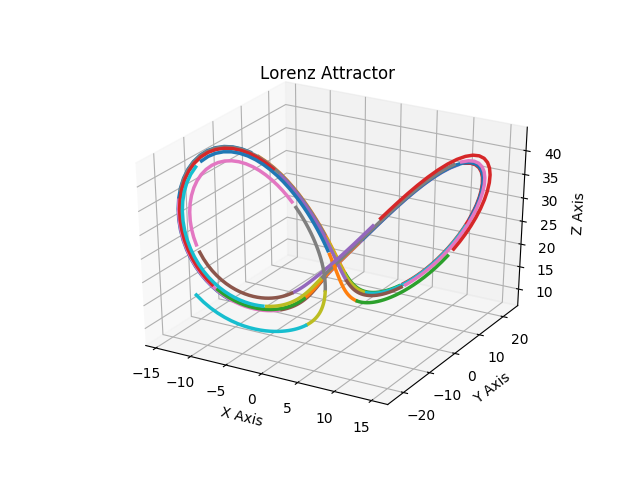

In [2]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

xyzs = xyzs[5000:10000]
xyz_coords = xyz_coords[5000:10000]
num_steps = len(xyzs)
#num_steps=num_steps-5000

traj_list = []
#num_steps=250
length = 25
i = 0
while i+length<num_steps:
    traj_list.append(xyzs[i:i+length])
    i = i+int(1*length)

ax = plt.figure().add_subplot(projection='3d')

for i in range(0,30):
    ax.plot(*xyz_coords[i*length:(i+1)*length].T, lw=2.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

Persistence intervals:
[(0, (0.0, inf)), (1, (0.491, 6.125)), (1, (0.667, 5.943)), (0, (0.0, 2.626)), (0, (0.0, 2.092)), (1, (0.845, 2.132)), (1, (1.129, 2.409)), (0, (0.0, 1.229)), (2, (7.133, 8.356)), (1, (0.884, 2.084))]


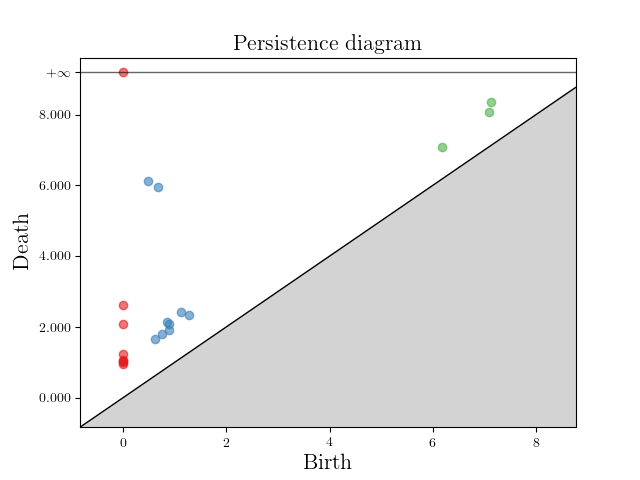

In [4]:
t2s = Traj2Sim()
t2s.set_trajectories(traj_list[:-2])
t2s.dist = 'mssd'

t2s.compute_mssd(verbose=False)
t2s.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])


In [ ]:
verbose=True
for i in range(len(t2s.trajectories)):
    for j in range(i+1, len(t2s.trajectories)):
        #self.MSSD[i][j-i-1].set_trajectories(self.trajectories[i], self.trajectories[j])
        #t2s.dist_mat[i,j] = t2s.MSSD[i][j-i-1].inf_metric()
        t2s.dist_mat[i,j] = t2s.MSSD[i][j-i-1].t_thresh_metric(t_thresh=10)
        t2s.dist_mat[j,i] = t2s.dist_mat[i,j]
        if verbose == True:
            print('Custom distance between ' + str(i) + ', ' + str(j) + ': ' + str(t2s.dist_mat[i,j]))
t2s.compute_sim(verbose=True)

print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])

Custom distance between 0, 1: 18.422
Custom distance between 0, 2: 33.802
Custom distance between 0, 3: 46.269
Custom distance between 0, 4: 22.857
Custom distance between 0, 5: 22.57
Custom distance between 0, 6: 0.293
Custom distance between 0, 7: 0.373
Custom distance between 0, 8: 29.307
Custom distance between 0, 9: 39.203
Custom distance between 0, 10: 32.143
Custom distance between 0, 11: 22.761
Custom distance between 0, 12: 11.26
Custom distance between 0, 13: 0.285
Custom distance between 0, 14: 21.712
Custom distance between 0, 15: 34.211
Custom distance between 0, 16: 46.858
Custom distance between 0, 17: 22.314
Custom distance between 0, 18: 20.001
Custom distance between 0, 19: 0.823
Custom distance between 0, 20: 5.635
Custom distance between 0, 21: 30.095
Custom distance between 0, 22: 38.572
Custom distance between 0, 23: 38.293
Custom distance between 0, 24: 21.115
Custom distance between 0, 25: 3.588
Custom distance between 0, 26: 2.632
Custom distance between 0, 27:

Custom distance between 2, 165: 14.822
Custom distance between 2, 166: 3.044
Custom distance between 2, 167: 3.263
Custom distance between 2, 168: 18.29
Custom distance between 2, 169: 13.936
Custom distance between 2, 170: 17.054
Custom distance between 2, 171: 27.848
Custom distance between 2, 172: 7.375
Custom distance between 2, 173: 9.481
Custom distance between 2, 174: 25.16
Custom distance between 2, 175: 15.213
Custom distance between 2, 176: 2.639
Custom distance between 2, 177: 10.908
Custom distance between 2, 178: 15.212
Custom distance between 2, 179: 6.094
Custom distance between 2, 180: 8.365
Custom distance between 2, 181: 14.831
Custom distance between 2, 182: 39.156
Custom distance between 2, 183: 8.999
Custom distance between 2, 184: 12.524
Custom distance between 2, 185: 14.382
Custom distance between 2, 186: 3.026
Custom distance between 2, 187: 7.567
Custom distance between 2, 188: 18.035
Custom distance between 2, 189: 4.496
Custom distance between 2, 190: 5.017


Custom distance between 6, 125: 39.806
Custom distance between 6, 126: 17.529
Custom distance between 6, 127: 18.13
Custom distance between 6, 128: 25.817
Custom distance between 6, 129: 44.023
Custom distance between 6, 130: 8.573
Custom distance between 6, 131: 2.913
Custom distance between 6, 132: 10.216
Custom distance between 6, 133: 14.726
Custom distance between 6, 134: 6.163
Custom distance between 6, 135: 1.774
Custom distance between 6, 136: 23.458
Custom distance between 6, 137: 24.426
Custom distance between 6, 138: 40.388
Custom distance between 6, 139: 16.816
Custom distance between 6, 140: 17.093
Custom distance between 6, 141: 21.279
Custom distance between 6, 142: 36.196
Custom distance between 6, 143: 20.911
Custom distance between 6, 144: 4.657
Custom distance between 6, 145: 4.676
Custom distance between 6, 146: 13.342
Custom distance between 6, 147: 1.602
Custom distance between 6, 148: 1.468
Custom distance between 6, 149: 18.828
Custom distance between 6, 150: 18

Custom distance between 9, 190: 5.488
Custom distance between 9, 191: 3.394
Custom distance between 9, 192: 27.463
Custom distance between 9, 193: 22.034
Custom distance between 9, 194: 36.874
Custom distance between 9, 195: 15.241
Custom distance between 9, 196: 16.488
Custom distance between 10, 11: 16.427
Custom distance between 10, 12: 32.037
Custom distance between 10, 13: 29.271
Custom distance between 10, 14: 23.052
Custom distance between 10, 15: 29.117
Custom distance between 10, 16: 1.06
Custom distance between 10, 17: 1.075
Custom distance between 10, 18: 26.711
Custom distance between 10, 19: 35.874
Custom distance between 10, 20: 22.977
Custom distance between 10, 21: 25.94
Custom distance between 10, 22: 24.98
Custom distance between 10, 23: 1.91
Custom distance between 10, 24: 12.77
Custom distance between 10, 25: 31.532
Custom distance between 10, 26: 25.153
Custom distance between 10, 27: 23.17
Custom distance between 10, 28: 31.023
Custom distance between 10, 29: 37.5

Custom distance between 13, 127: 29.814
Custom distance between 13, 128: 38.317
Custom distance between 13, 129: 36.205
Custom distance between 13, 130: 22.687
Custom distance between 13, 131: 5.822
Custom distance between 13, 132: 3.024
Custom distance between 13, 133: 21.306
Custom distance between 13, 134: 26.517
Custom distance between 13, 135: 2.147
Custom distance between 13, 136: 3.037
Custom distance between 13, 137: 31.376
Custom distance between 13, 138: 39.295
Custom distance between 13, 139: 25.024
Custom distance between 13, 140: 29.739
Custom distance between 13, 141: 37.494
Custom distance between 13, 142: 43.945
Custom distance between 13, 143: 21.027
Custom distance between 13, 144: 11.919
Custom distance between 13, 145: 4.36
Custom distance between 13, 146: 15.394
Custom distance between 13, 147: 19.621
Custom distance between 13, 148: 1.148
Custom distance between 13, 149: 10.627
Custom distance between 13, 150: 30.652
Custom distance between 13, 151: 38.576
Custom 

Custom distance between 17, 47: 27.175
Custom distance between 17, 48: 6.948
Custom distance between 17, 49: 10.597
Custom distance between 17, 50: 17.154
Custom distance between 17, 51: 11.072
Custom distance between 17, 52: 13.388
Custom distance between 17, 53: 20.09
Custom distance between 17, 54: 12.138
Custom distance between 17, 55: 14.676
Custom distance between 17, 56: 18.839
Custom distance between 17, 57: 18.664
Custom distance between 17, 58: 15.686
Custom distance between 17, 59: 15.018
Custom distance between 17, 60: 3.561
Custom distance between 17, 61: 9.669
Custom distance between 17, 62: 19.225
Custom distance between 17, 63: 13.125
Custom distance between 17, 64: 2.693
Custom distance between 17, 65: 11.453
Custom distance between 17, 66: 19.872
Custom distance between 17, 67: 11.892
Custom distance between 17, 68: 14.003
Custom distance between 17, 69: 20.39
Custom distance between 17, 70: 15.085
Custom distance between 17, 71: 14.949
Custom distance between 17, 72:

Custom distance between 21, 38: 9.49
Custom distance between 21, 39: 28.622
Custom distance between 21, 40: 4.638
Custom distance between 21, 41: 5.336
Custom distance between 21, 42: 24.763
Custom distance between 21, 43: 8.432
Custom distance between 21, 44: 3.641
Custom distance between 21, 45: 5.914
Custom distance between 21, 46: 9.034
Custom distance between 21, 47: 14.296
Custom distance between 21, 48: 22.003
Custom distance between 21, 49: 18.068
Custom distance between 21, 50: 17.487
Custom distance between 21, 51: 7.306
Custom distance between 21, 52: 15.352
Custom distance between 21, 53: 20.726
Custom distance between 21, 54: 3.497
Custom distance between 21, 55: 7.282
Custom distance between 21, 56: 22.68
Custom distance between 21, 57: 11.052
Custom distance between 21, 58: 5.048
Custom distance between 21, 59: 21.176
Custom distance between 21, 60: 10.594
Custom distance between 21, 61: 1.888
Custom distance between 21, 62: 3.603
Custom distance between 21, 63: 26.575
C

Custom distance between 24, 193: 2.915
Custom distance between 24, 194: 18.454
Custom distance between 24, 195: 9.441
Custom distance between 24, 196: 5.573
Custom distance between 25, 26: 14.884
Custom distance between 25, 27: 11.862
Custom distance between 25, 28: 10.594
Custom distance between 25, 29: 6.422
Custom distance between 25, 30: 15.649
Custom distance between 25, 31: 21.435
Custom distance between 25, 32: 31.265
Custom distance between 25, 33: 18.007
Custom distance between 25, 34: 15.244
Custom distance between 25, 35: 25.948
Custom distance between 25, 36: 26.989
Custom distance between 25, 37: 9.08
Custom distance between 25, 38: 4.848
Custom distance between 25, 39: 3.822
Custom distance between 25, 40: 18.478
Custom distance between 25, 41: 20.717
Custom distance between 25, 42: 37.941
Custom distance between 25, 43: 11.725
Custom distance between 25, 44: 12.275
Custom distance between 25, 45: 15.185
Custom distance between 25, 46: 18.881
Custom distance between 25, 4

Custom distance between 28, 95: 23.506
Custom distance between 28, 96: 16.627
Custom distance between 28, 97: 8.05
Custom distance between 28, 98: 18.393
Custom distance between 28, 99: 22.553
Custom distance between 28, 100: 2.26
Custom distance between 28, 101: 0.234
Custom distance between 28, 102: 10.766
Custom distance between 28, 103: 26.049
Custom distance between 28, 104: 13.23
Custom distance between 28, 105: 28.137
Custom distance between 28, 106: 11.854
Custom distance between 28, 107: 7.2
Custom distance between 28, 108: 21.473
Custom distance between 28, 109: 18.738
Custom distance between 28, 110: 3.029
Custom distance between 28, 111: 5.319
Custom distance between 28, 112: 34.795
Custom distance between 28, 113: 9.61
Custom distance between 28, 114: 13.578
Custom distance between 28, 115: 33.894
Custom distance between 28, 116: 5.454
Custom distance between 28, 117: 1.289
Custom distance between 28, 118: 3.462
Custom distance between 28, 119: 5.521
Custom distance betwee

Custom distance between 32, 120: 39.967
Custom distance between 32, 121: 2.734
Custom distance between 32, 122: 1.283
Custom distance between 32, 123: 14.877
Custom distance between 32, 124: 5.735
Custom distance between 32, 125: 1.445
Custom distance between 32, 126: 18.055
Custom distance between 32, 127: 17.823
Custom distance between 32, 128: 7.848
Custom distance between 32, 129: 6.518
Custom distance between 32, 130: 25.067
Custom distance between 32, 131: 32.237
Custom distance between 32, 132: 28.534
Custom distance between 32, 133: 18.667
Custom distance between 32, 134: 25.079
Custom distance between 32, 135: 40.445
Custom distance between 32, 136: 14.139
Custom distance between 32, 137: 5.832
Custom distance between 32, 138: 1.904
Custom distance between 32, 139: 18.833
Custom distance between 32, 140: 19.439
Custom distance between 32, 141: 17.159
Custom distance between 32, 142: 8.214
Custom distance between 32, 143: 19.012
Custom distance between 32, 144: 29.714
Custom di

Custom distance between 36, 120: 28.895
Custom distance between 36, 121: 22.493
Custom distance between 36, 122: 5.218
Custom distance between 36, 123: 5.359
Custom distance between 36, 124: 21.032
Custom distance between 36, 125: 2.288
Custom distance between 36, 126: 2.36
Custom distance between 36, 127: 21.562
Custom distance between 36, 128: 28.803
Custom distance between 36, 129: 3.43
Custom distance between 36, 130: 6.859
Custom distance between 36, 131: 26.968
Custom distance between 36, 132: 21.98
Custom distance between 36, 133: 20.514
Custom distance between 36, 134: 27.656
Custom distance between 36, 135: 33.016
Custom distance between 36, 136: 21.564
Custom distance between 36, 137: 23.351
Custom distance between 36, 138: 1.737
Custom distance between 36, 139: 1.741
Custom distance between 36, 140: 22.008
Custom distance between 36, 141: 30.658
Custom distance between 36, 142: 11.945
Custom distance between 36, 143: 5.841
Custom distance between 36, 144: 22.207
Custom dista

Custom distance between 39, 129: 43.734
Custom distance between 39, 130: 18.024
Custom distance between 39, 131: 4.332
Custom distance between 39, 132: 5.043
Custom distance between 39, 133: 24.799
Custom distance between 39, 134: 18.238
Custom distance between 39, 135: 0.261
Custom distance between 39, 136: 14.329
Custom distance between 39, 137: 33.44
Custom distance between 39, 138: 46.517
Custom distance between 39, 139: 24.367
Custom distance between 39, 140: 26.929
Custom distance between 39, 141: 32.388
Custom distance between 39, 142: 45.87
Custom distance between 39, 143: 22.042
Custom distance between 39, 144: 6.2
Custom distance between 39, 145: 6.094
Custom distance between 39, 146: 21.967
Custom distance between 39, 147: 11.146
Custom distance between 39, 148: 2.808
Custom distance between 39, 149: 20.438
Custom distance between 39, 150: 28.459
Custom distance between 39, 151: 34.938
Custom distance between 39, 152: 49.823
Custom distance between 39, 153: 16.766
Custom dis

Custom distance between 43, 181: 17.311
Custom distance between 43, 182: 30.451
Custom distance between 43, 183: 14.306
Custom distance between 43, 184: 20.346
Custom distance between 43, 185: 3.555
Custom distance between 43, 186: 5.106
Custom distance between 43, 187: 18.583
Custom distance between 43, 188: 0.568
Custom distance between 43, 189: 0.609
Custom distance between 43, 190: 12.094
Custom distance between 43, 191: 19.113
Custom distance between 43, 192: 6.436
Custom distance between 43, 193: 8.576
Custom distance between 43, 194: 22.121
Custom distance between 43, 195: 8.437
Custom distance between 43, 196: 7.446
Custom distance between 44, 45: 2.575
Custom distance between 44, 46: 6.759
Custom distance between 44, 47: 18.664
Custom distance between 44, 48: 19.655
Custom distance between 44, 49: 16.318
Custom distance between 44, 50: 20.915
Custom distance between 44, 51: 6.819
Custom distance between 44, 52: 12.901
Custom distance between 44, 53: 24.389
Custom distance betw

Custom distance between 48, 67: 19.9
Custom distance between 48, 68: 20.893
Custom distance between 48, 69: 20.475
Custom distance between 48, 70: 23.086
Custom distance between 48, 71: 23.619
Custom distance between 48, 72: 17.559
Custom distance between 48, 73: 8.304
Custom distance between 48, 74: 16.231
Custom distance between 48, 75: 21.832
Custom distance between 48, 76: 25.103
Custom distance between 48, 77: 23.56
Custom distance between 48, 78: 27.319
Custom distance between 48, 79: 9.723
Custom distance between 48, 80: 10.252
Custom distance between 48, 81: 22.956
Custom distance between 48, 82: 26.33
Custom distance between 48, 83: 23.413
Custom distance between 48, 84: 26.399
Custom distance between 48, 85: 22.685
Custom distance between 48, 86: 12.89
Custom distance between 48, 87: 15.724
Custom distance between 48, 88: 27.468
Custom distance between 48, 89: 9.587
Custom distance between 48, 90: 11.167
Custom distance between 48, 91: 23.398
Custom distance between 48, 92: 2

Custom distance between 52, 74: 8.115
Custom distance between 52, 75: 4.107
Custom distance between 52, 76: 16.689
Custom distance between 52, 77: 18.42
Custom distance between 52, 78: 26.332
Custom distance between 52, 79: 27.683
Custom distance between 52, 80: 11.828
Custom distance between 52, 81: 12.814
Custom distance between 52, 82: 8.598
Custom distance between 52, 83: 7.767
Custom distance between 52, 84: 22.777
Custom distance between 52, 85: 30.67
Custom distance between 52, 86: 19.965
Custom distance between 52, 87: 16.256
Custom distance between 52, 88: 27.364
Custom distance between 52, 89: 25.471
Custom distance between 52, 90: 11.789
Custom distance between 52, 91: 12.312
Custom distance between 52, 92: 7.9
Custom distance between 52, 93: 12.416
Custom distance between 52, 94: 22.654
Custom distance between 52, 95: 32.297
Custom distance between 52, 96: 17.521
Custom distance between 52, 97: 16.542
Custom distance between 52, 98: 29.008
Custom distance between 52, 99: 22

Custom distance between 57, 133: 6.11
Custom distance between 57, 134: 19.343
Custom distance between 57, 135: 18.524
Custom distance between 57, 136: 0.355
Custom distance between 57, 137: 11.895
Custom distance between 57, 138: 18.888
Custom distance between 57, 139: 16.341
Custom distance between 57, 140: 16.588
Custom distance between 57, 141: 22.066
Custom distance between 57, 142: 24.16
Custom distance between 57, 143: 23.103
Custom distance between 57, 144: 20.812
Custom distance between 57, 145: 7.566
Custom distance between 57, 146: 7.362
Custom distance between 57, 147: 17.468
Custom distance between 57, 148: 7.533
Custom distance between 57, 149: 3.902
Custom distance between 57, 150: 14.6
Custom distance between 57, 151: 22.111
Custom distance between 57, 152: 23.46
Custom distance between 57, 153: 20.146
Custom distance between 57, 154: 21.367
Custom distance between 57, 155: 6.893
Custom distance between 57, 156: 7.25
Custom distance between 57, 157: 19.881
Custom distanc

Custom distance between 63, 185: 11.124
Custom distance between 63, 186: 19.894
Custom distance between 63, 187: 5.18
Custom distance between 63, 188: 6.345
Custom distance between 63, 189: 28.544
Custom distance between 63, 190: 26.398
Custom distance between 63, 191: 0.975
Custom distance between 63, 192: 1.6
Custom distance between 63, 193: 36.676
Custom distance between 63, 194: 42.971
Custom distance between 63, 195: 28.473
Custom distance between 63, 196: 33.759
Custom distance between 64, 65: 5.649
Custom distance between 64, 66: 20.743
Custom distance between 64, 67: 9.363
Custom distance between 64, 68: 9.788
Custom distance between 64, 69: 16.887
Custom distance between 64, 70: 15.253
Custom distance between 64, 71: 14.751
Custom distance between 64, 72: 29.654
Custom distance between 64, 73: 4.121
Custom distance between 64, 74: 5.98
Custom distance between 64, 75: 11.688
Custom distance between 64, 76: 25.516
Custom distance between 64, 77: 14.849
Custom distance between 64

Custom distance between 70, 106: 10.688
Custom distance between 70, 107: 9.325
Custom distance between 70, 108: 14.726
Custom distance between 70, 109: 16.591
Custom distance between 70, 110: 11.576
Custom distance between 70, 111: 16.748
Custom distance between 70, 112: 6.426
Custom distance between 70, 113: 1.098
Custom distance between 70, 114: 10.227
Custom distance between 70, 115: 22.455
Custom distance between 70, 116: 10.626
Custom distance between 70, 117: 12.412
Custom distance between 70, 118: 18.018
Custom distance between 70, 119: 22.112
Custom distance between 70, 120: 8.034
Custom distance between 70, 121: 6.79
Custom distance between 70, 122: 18.441
Custom distance between 70, 123: 10.157
Custom distance between 70, 124: 8.773
Custom distance between 70, 125: 18.583
Custom distance between 70, 126: 11.947
Custom distance between 70, 127: 10.031
Custom distance between 70, 128: 14.769
Custom distance between 70, 129: 26.903
Custom distance between 70, 130: 14.393
Custom 

Custom distance between 75, 192: 25.676
Custom distance between 75, 193: 6.046
Custom distance between 75, 194: 7.194
Custom distance between 75, 195: 14.456
Custom distance between 75, 196: 2.432
Custom distance between 76, 77: 16.856
Custom distance between 76, 78: 32.001
Custom distance between 76, 79: 23.938
Custom distance between 76, 80: 23.659
Custom distance between 76, 81: 31.37
Custom distance between 76, 82: 32.171
Custom distance between 76, 83: 3.841
Custom distance between 76, 84: 9.417
Custom distance between 76, 85: 30.771
Custom distance between 76, 86: 23.134
Custom distance between 76, 87: 25.101
Custom distance between 76, 88: 32.903
Custom distance between 76, 89: 23.495
Custom distance between 76, 90: 23.964
Custom distance between 76, 91: 31.815
Custom distance between 76, 92: 28.802
Custom distance between 76, 93: 3.695
Custom distance between 76, 94: 14.567
Custom distance between 76, 95: 31.032
Custom distance between 76, 96: 23.119
Custom distance between 76,

Custom distance between 80, 185: 4.359
Custom distance between 80, 186: 5.578
Custom distance between 80, 187: 18.935
Custom distance between 80, 188: 4.985
Custom distance between 80, 189: 1.051
Custom distance between 80, 190: 6.315
Custom distance between 80, 191: 18.186
Custom distance between 80, 192: 9.205
Custom distance between 80, 193: 8.21
Custom distance between 80, 194: 22.188
Custom distance between 80, 195: 7.873
Custom distance between 80, 196: 4.02
Custom distance between 81, 82: 3.805
Custom distance between 81, 83: 34.694
Custom distance between 81, 84: 14.789
Custom distance between 81, 85: 21.573
Custom distance between 81, 86: 19.42
Custom distance between 81, 87: 8.405
Custom distance between 81, 88: 16.548
Custom distance between 81, 89: 25.561
Custom distance between 81, 90: 3.321
Custom distance between 81, 91: 0.151
Custom distance between 81, 92: 5.525
Custom distance between 81, 93: 38.492
Custom distance between 81, 94: 14.533
Custom distance between 81, 95

Custom distance between 86, 150: 16.358
Custom distance between 86, 151: 22.965
Custom distance between 86, 152: 9.502
Custom distance between 86, 153: 9.215
Custom distance between 86, 154: 19.04
Custom distance between 86, 155: 19.072
Custom distance between 86, 156: 14.199
Custom distance between 86, 157: 19.771
Custom distance between 86, 158: 26.762
Custom distance between 86, 159: 14.48
Custom distance between 86, 160: 17.339
Custom distance between 86, 161: 14.0
Custom distance between 86, 162: 6.178
Custom distance between 86, 163: 13.694
Custom distance between 86, 164: 23.631
Custom distance between 86, 165: 15.609
Custom distance between 86, 166: 14.73
Custom distance between 86, 167: 21.429
Custom distance between 86, 168: 8.733
Custom distance between 86, 169: 8.15
Custom distance between 86, 170: 18.003
Custom distance between 86, 171: 22.401
Custom distance between 86, 172: 14.204
Custom distance between 86, 173: 18.404
Custom distance between 86, 174: 25.464
Custom dist

Custom distance between 93, 180: 40.171
Custom distance between 93, 181: 29.29
Custom distance between 93, 182: 1.093
Custom distance between 93, 183: 19.383
Custom distance between 93, 184: 38.947
Custom distance between 93, 185: 28.899
Custom distance between 93, 186: 32.759
Custom distance between 93, 187: 41.689
Custom distance between 93, 188: 28.021
Custom distance between 93, 189: 31.301
Custom distance between 93, 190: 40.005
Custom distance between 93, 191: 46.219
Custom distance between 93, 192: 27.424
Custom distance between 93, 193: 21.621
Custom distance between 93, 194: 8.537
Custom distance between 93, 195: 12.933
Custom distance between 93, 196: 30.085
Custom distance between 94, 95: 7.314
Custom distance between 94, 96: 14.938
Custom distance between 94, 97: 6.56
Custom distance between 94, 98: 5.819
Custom distance between 94, 99: 20.407
Custom distance between 94, 100: 12.884
Custom distance between 94, 101: 16.111
Custom distance between 94, 102: 27.024
Custom dista

Custom distance between 102, 143: 23.72
Custom distance between 102, 144: 8.432
Custom distance between 102, 145: 10.085
Custom distance between 102, 146: 15.367
Custom distance between 102, 147: 5.899
Custom distance between 102, 148: 4.954
Custom distance between 102, 149: 19.351
Custom distance between 102, 150: 17.21
Custom distance between 102, 151: 21.7
Custom distance between 102, 152: 45.86
Custom distance between 102, 153: 14.555
Custom distance between 102, 154: 7.436
Custom distance between 102, 155: 16.778
Custom distance between 102, 156: 12.124
Custom distance between 102, 157: 4.433
Custom distance between 102, 158: 4.164
Custom distance between 102, 159: 19.801
Custom distance between 102, 160: 20.42
Custom distance between 102, 161: 36.858
Custom distance between 102, 162: 22.628
Custom distance between 102, 163: 6.831
Custom distance between 102, 164: 4.682
Custom distance between 102, 165: 25.616
Custom distance between 102, 166: 18.088
Custom distance between 102, 1

Custom distance between 112, 186: 30.044
Custom distance between 112, 187: 39.042
Custom distance between 112, 188: 25.751
Custom distance between 112, 189: 28.365
Custom distance between 112, 190: 37.054
Custom distance between 112, 191: 43.445
Custom distance between 112, 192: 24.978
Custom distance between 112, 193: 19.078
Custom distance between 112, 194: 5.509
Custom distance between 112, 195: 10.54
Custom distance between 112, 196: 27.41
Custom distance between 113, 114: 4.552
Custom distance between 113, 115: 23.505
Custom distance between 113, 116: 8.103
Custom distance between 113, 117: 8.667
Custom distance between 113, 118: 13.39
Custom distance between 113, 119: 19.412
Custom distance between 113, 120: 21.183
Custom distance between 113, 121: 5.644
Custom distance between 113, 122: 17.574
Custom distance between 113, 123: 9.327
Custom distance between 113, 124: 4.202
Custom distance between 113, 125: 17.562
Custom distance between 113, 126: 11.668
Custom distance between 11

Custom distance between 120, 196: 32.235
Custom distance between 121, 122: 8.777
Custom distance between 121, 123: 12.701
Custom distance between 121, 124: 5.995
Custom distance between 121, 125: 6.548
Custom distance between 121, 126: 15.621
Custom distance between 121, 127: 13.354
Custom distance between 121, 128: 10.048
Custom distance between 121, 129: 16.593
Custom distance between 121, 130: 20.482
Custom distance between 121, 131: 25.475
Custom distance between 121, 132: 15.837
Custom distance between 121, 133: 11.142
Custom distance between 121, 134: 18.984
Custom distance between 121, 135: 33.556
Custom distance between 121, 136: 5.325
Custom distance between 121, 137: 5.727
Custom distance between 121, 138: 7.128
Custom distance between 121, 139: 15.913
Custom distance between 121, 140: 14.21
Custom distance between 121, 141: 15.132
Custom distance between 121, 142: 11.008
Custom distance between 121, 143: 25.321
Custom distance between 121, 144: 23.515
Custom distance between

Custom distance between 130, 194: 17.892
Custom distance between 130, 195: 9.926
Custom distance between 130, 196: 6.332
Custom distance between 131, 132: 14.031
Custom distance between 131, 133: 11.604
Custom distance between 131, 134: 6.497
Custom distance between 131, 135: 4.522
Custom distance between 131, 136: 19.847
Custom distance between 131, 137: 21.047
Custom distance between 131, 138: 36.695
Custom distance between 131, 139: 13.233
Custom distance between 131, 140: 13.919
Custom distance between 131, 141: 18.847
Custom distance between 131, 142: 32.992
Custom distance between 131, 143: 17.47
Custom distance between 131, 144: 1.679
Custom distance between 131, 145: 6.602
Custom distance between 131, 146: 9.85
Custom distance between 131, 147: 2.234
Custom distance between 131, 148: 1.504
Custom distance between 131, 149: 15.247
Custom distance between 131, 150: 15.329
Custom distance between 131, 151: 21.57
Custom distance between 131, 152: 42.089
Custom distance between 131,

Custom distance between 143, 172: 18.117
Custom distance between 143, 173: 20.106
Custom distance between 143, 174: 21.914
Custom distance between 143, 175: 22.66
Custom distance between 143, 176: 21.378
Custom distance between 143, 177: 17.389
Custom distance between 143, 178: 6.967
Custom distance between 143, 179: 14.23
Custom distance between 143, 180: 23.797
Custom distance between 143, 181: 26.816
Custom distance between 143, 182: 25.018
Custom distance between 143, 183: 24.625
Custom distance between 143, 184: 17.207
Custom distance between 143, 185: 10.685
Custom distance between 143, 186: 15.117
Custom distance between 143, 187: 21.935
Custom distance between 143, 188: 7.597
Custom distance between 143, 189: 12.353
Custom distance between 143, 190: 23.6
Custom distance between 143, 191: 29.376
Custom distance between 143, 192: 0.751
Custom distance between 143, 193: 10.418
Custom distance between 143, 194: 18.121
Custom distance between 143, 195: 17.681
Custom distance between

Custom distance between 161, 164: 40.05
Custom distance between 161, 165: 22.183
Custom distance between 161, 166: 18.306
Custom distance between 161, 167: 6.683
Custom distance between 161, 168: 1.849
Custom distance between 161, 169: 27.886
Custom distance between 161, 170: 32.108
Custom distance between 161, 171: 36.819
Custom distance between 161, 172: 21.26
Custom distance between 161, 173: 25.138
Custom distance between 161, 174: 40.388
Custom distance between 161, 175: 21.525
Custom distance between 161, 176: 8.268
Custom distance between 161, 177: 2.609
Custom distance between 161, 178: 19.242
Custom distance between 161, 179: 21.541
Custom distance between 161, 180: 23.466
Custom distance between 161, 181: 30.116
Custom distance between 161, 182: 50.832
Custom distance between 161, 183: 9.346
Custom distance between 161, 184: 5.786
Custom distance between 161, 185: 16.85
Custom distance between 161, 186: 10.266
Custom distance between 161, 187: 3.115
Custom distance between 16

In [72]:
t2s_n = Traj2Sim()
t2s_n.set_trajectories(traj_list)
t2s_n.dist = 'mssd'

t2s_n.compute_mssd(verbose=True)
t2s_n.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s_n.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])


Persistence intervals:
[]


IndexError: list index out of range